# <center>Анализ главных компонент</center>
## <center>Мандрикова Анастасия</center>

Рассмотрим баллы полученные за задачи по физике и математике при поступлении в ФШТ.

In [1]:
library("FactoMineR")
library("factoextra")
df <-  read.table(file = "EXBOY.txt", header = TRUE, sep = " ")
colnames(df)[1] <- "N"
head(df)

Warning message:
"package 'FactoMineR' was built under R version 4.0.5"
Warning message:
"package 'factoextra' was built under R version 4.0.5"
Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



,N,M1,M2,M3,M4,P1,P2,P3,P4,P5,P6,P7,RES
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,0,0,0,0,2,1,0,0,0,2,0,0
2,2,0,0,0,0,3,1,0,0,0,0,0,0
3,3,0,0,0,6,3,1,0,3,0,0,0,0
4,4,0,1,2,0,3,0,1,3,6,5,0,1
5,5,5,2,2,0,0,3,1,3,2,5,0,1
6,6,8,0,0,0,3,2,0,3,0,5,0,1


Выше представлена часть матрицы данных $X$.

In [2]:
X <- df[,2:12]
summary(X)

       M1               M2               M3               M4        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.4929   Mean   :0.4214   Mean   :0.5286   Mean   :0.3214  
 3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:0.0000  
 Max.   :8.0000   Max.   :2.0000   Max.   :6.0000   Max.   :6.0000  
       P1             P2              P3             P4              P5       
 Min.   :0.00   Min.   :0.000   Min.   :0.00   Min.   :0.000   Min.   :0.000  
 1st Qu.:0.00   1st Qu.:0.000   1st Qu.:0.00   1st Qu.:0.000   1st Qu.:0.000  
 Median :3.00   Median :1.000   Median :0.00   Median :3.000   Median :0.000  
 Mean   :1.75   Mean   :1.179   Mean   :0.45   Mean   :1.821   Mean   :1.064  
 3rd Qu.:3.00   3rd Qu.:2.000   3rd Qu.:1.00   3rd Qu.:3.000   3rd Qu.:1.000  
 Max.   :3.00   Max.   :3.000   Max.   :3.0

Не будем нормировать признаки, так как скорее всего разные максимальные баллы за задачи отображют сложность задачи.

In [3]:
res.pca <- PCA(X, graph = FALSE, ncp = 6)

Собственные числа и вклад компонент:

In [4]:
eig.val <- get_eigenvalue(res.pca)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,2.8294557,25.722324,25.72232
Dim.2,1.4700786,13.364351,39.08668
Dim.3,1.1995896,10.905360,49.99204
Dim.4,1.0797094,9.815540,59.80758
Dim.5,0.8368148,7.607408,67.41498
Dim.6,0.7418357,6.743961,74.15894
Dim.7,0.6524906,5.931733,80.09068
Dim.8,0.6399074,5.817340,85.90802
Dim.9,0.6056098,5.505544,91.41356
Dim.10,0.4857135,4.415577,95.82914


Выше первый столбец - $\lambda_i$ (собственные числа $X^TX$), второй столбец - процент объясненной дисперсии $\frac{\lambda_i}{\sum\limits_i \lambda_i}$, третий столбец - кумулятивный процент объясненной дисперсии.

На графике прямогугольники соответсвуют упорядоченным по убыванию собственным числам $\lambda_i$.

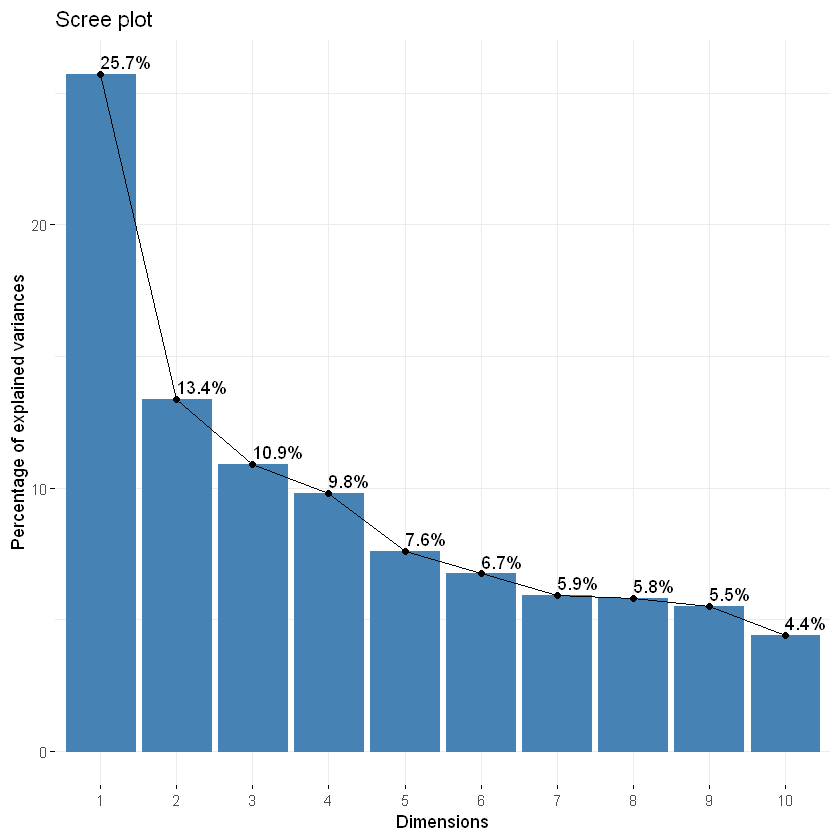

In [5]:
fviz_eig(res.pca, addlabels = TRUE)

Остановимся на $6$ главных компонентах для рассмотрения, в них содержится $74\%$ информации.

In [6]:
var <- get_pca_var(res.pca)

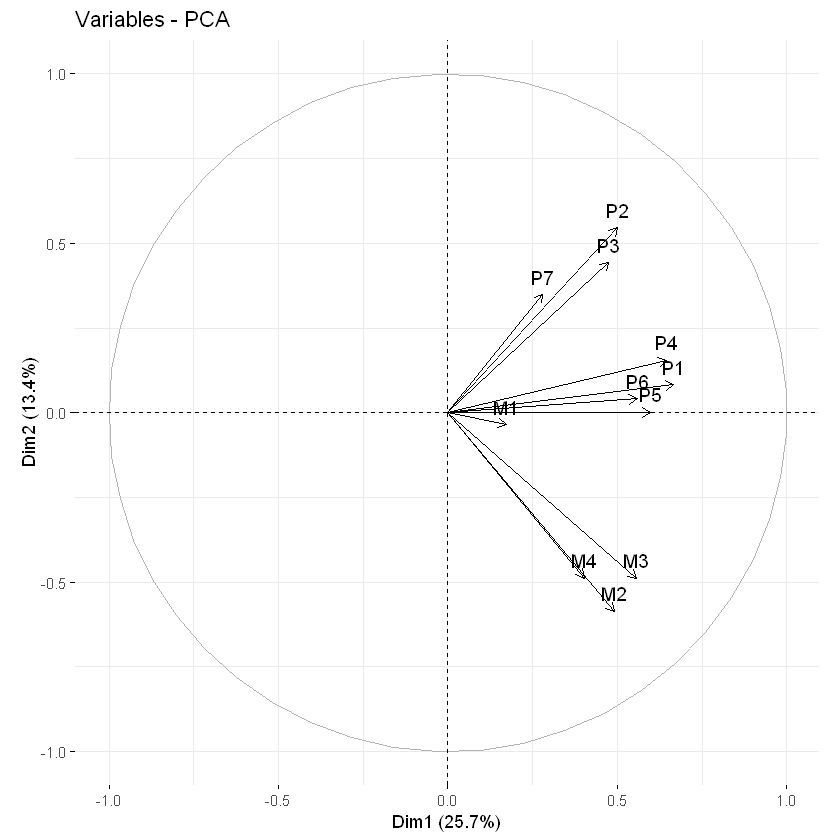

In [7]:
res.pca2 <- PCA(X, scale.unit = TRUE, graph = FALSE, ncp = 6)
fviz_pca_var(res.pca2, col.var = "black")

Положительно коррелированные переменные сгруппированы на графике вместе. При этом, так как все вектора короткие, не достаточно первых двух компонент для описания признаков.   
Ось $x$ - $F_1$, ось $y$ - $F_2$. Координаты векторов-старых признаков соответсвующие элементы из $F_1$ и $F_2$.

Матрица факторных координат признаков $F$:

In [8]:
var$coord

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6
M1,0.1723898,-0.035769370,0.666102584,0.48857665,0.36341247,-0.19462746
M2,0.4912963,-0.585745232,0.219092094,0.19496796,-0.07733594,0.01359773
M3,0.5566874,-0.488218661,0.230186677,-0.18775397,-0.28935829,-0.12308197
M4,0.4024361,-0.487660776,-0.152446131,-0.26174826,0.51489630,0.18367591
P1,0.6666719,0.083532417,-0.240919179,-0.03899988,-0.06318568,0.23180220
P2,0.4996679,0.545768572,-0.079528474,0.31199236,0.17646326,-0.16982140
P3,0.4750271,0.443511069,0.330127294,-0.28730392,-0.25458027,-0.08012570
P4,0.6460984,0.155910734,-0.420035175,0.16155841,0.25612472,0.05396196
P5,0.5991831,0.001597656,-0.190629766,-0.27917545,-0.02415412,-0.56702825
P6,0.5582186,0.041692189,0.001600526,0.42190545,-0.37106310,0.35990140


Матрица собственных векторов $U_i = \frac{F_i}{\sqrt{\lambda_i}}$:

In [9]:
var$cor

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6
M1,0.1723898,-0.035769370,0.666102584,0.48857665,0.36341247,-0.19462746
M2,0.4912963,-0.585745232,0.219092094,0.19496796,-0.07733594,0.01359773
M3,0.5566874,-0.488218661,0.230186677,-0.18775397,-0.28935829,-0.12308197
M4,0.4024361,-0.487660776,-0.152446131,-0.26174826,0.51489630,0.18367591
P1,0.6666719,0.083532417,-0.240919179,-0.03899988,-0.06318568,0.23180220
P2,0.4996679,0.545768572,-0.079528474,0.31199236,0.17646326,-0.16982140
P3,0.4750271,0.443511069,0.330127294,-0.28730392,-0.25458027,-0.08012570
P4,0.6460984,0.155910734,-0.420035175,0.16155841,0.25612472,0.05396196
P5,0.5991831,0.001597656,-0.190629766,-0.27917545,-0.02415412,-0.56702825
P6,0.5582186,0.041692189,0.001600526,0.42190545,-0.37106310,0.35990140


Первый новый признак: сумма баллов за задачи.
Второй новый признак: разность между суммами баллов по физике математике. 

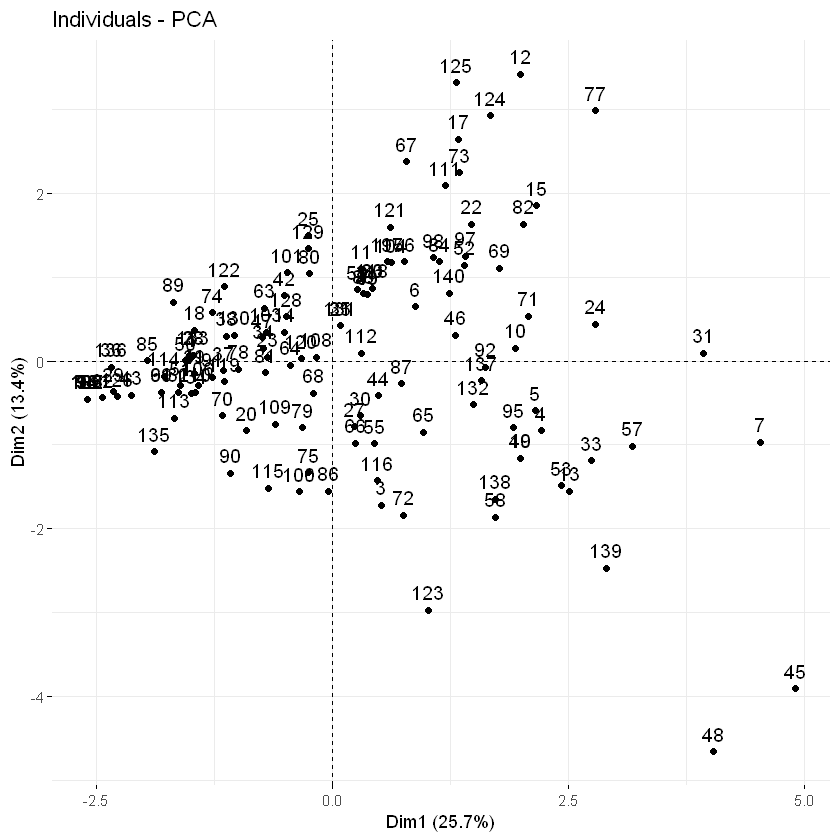

In [10]:
fviz_pca_ind(res.pca)

Точки на графике $z_{ij} = <x_i, U_j>$.

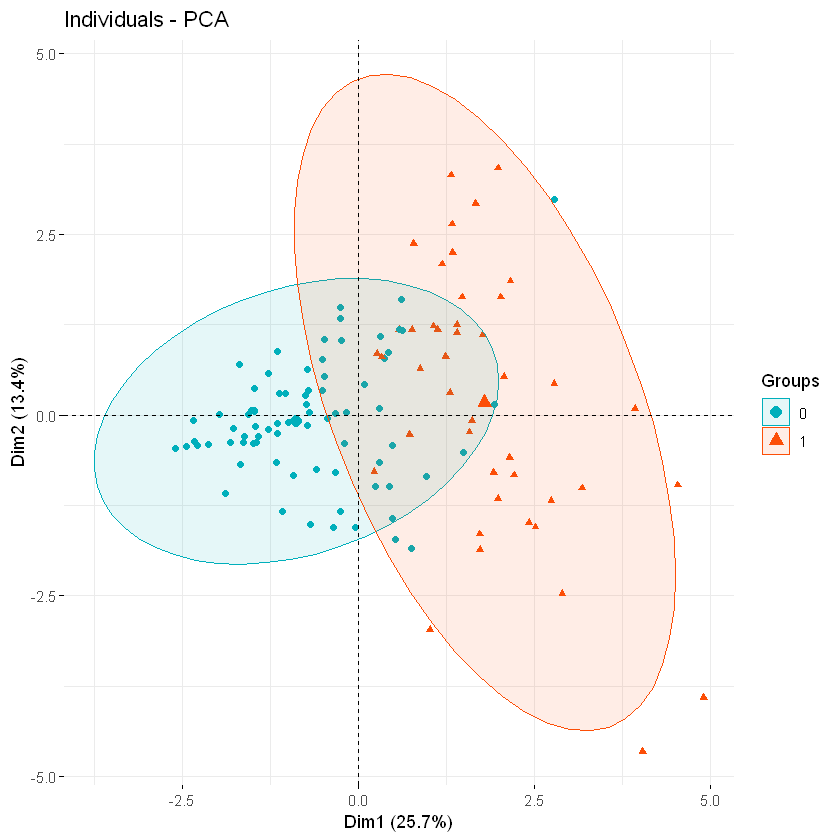

In [11]:
fviz_pca_ind(res.pca,
             geom.ind = "point", # show points only (nbut not "text")
             col.ind = as.factor(df$RES), # color by groups
             palette = c("#00AFBB", "#FC4E07"),
             addEllipses = TRUE, # Concentration ellipses
             legend.title = "Groups"
             )

У индивидов под номерами $45$ и $48$ большая сумма баллов за все задачи и маленькая разница между суммой баллов по физике и математике, то есть баллы по математике даже превышают баллы по физике.

In [12]:
df[77,]

,N,M1,M2,M3,M4,P1,P2,P3,P4,P5,P6,P7,RES
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
77,77,0,0,0,0,3,3,3,3,5,5,1,0


У индивида под номером $77$ нет ни одного балла по математике, поэтому значение второй главной компоненты довольно высокое и должно примерно совпадать со значением первой главной компоненты.

In [13]:
ind <- get_pca_ind(res.pca)

Факторные координаты индивидов $Z$:

In [14]:
head(ind$coord, 10)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6
1,-1.4817812,0.05242039,-0.09053342,-0.2001716,-0.1438798,0.11296706
2,-1.5192702,0.06786241,-0.24467877,-0.6088876,0.1904207,-0.09391281
3,0.5217400,-1.71646081,-1.77247875,-1.5670109,3.6657363,1.13042413
4,2.2093935,-0.82942317,-0.54482657,-0.7806353,-1.3897105,-1.15948551
5,2.1463530,-0.59000261,2.39746569,2.4396904,0.5147888,-1.60829809
6,0.8803464,0.64393286,2.14621191,3.4556595,2.1254285,-0.35549709
7,4.5303666,-0.96694700,2.80530616,-3.7796180,1.1109220,2.48962412
8,-2.5957526,-0.45559192,0.27491014,-0.7841031,0.1715241,-0.48824357
9,0.5809607,1.18219420,-1.17947390,1.1852572,0.1558624,0.69100328
10,1.9341962,0.15411363,1.28616970,-1.6710773,-2.8670953,-0.93222755
